# Medición de tiempo con Python

La idea de estos apuntes es presentar medidas de tiempo para varias implementaciones de un mismo algoritmo desde Python y ver como la implementación afecta al rendimiento de este. Para esto se implementará una función que calcule la suma de números enteros.

## Módulo timeit

Se empleará para medir el tiempo. La forma de uso es mucho más complicada que lo que se muestra en los ejemplos, pero se emplea la forma simplificada por fines demostrativos. La función timeit devuelve el tiempo transcurrido luego de ejecutar la función indicada la cantidad de veces en su segundo argumento. Por esta razón, para obtener el tiempo promedio transcurrido se dividirá el resultado de `timeit` entre la cantidad de veces.

In [1]:
import timeit

## Implementación while

In [2]:
def sumar_enteros_while(n=1_000_000):
    i = 0
    s = 0
    while (i < n):
        s += i
        i += 1
    return s

In [3]:
timeit.timeit(sumar_enteros_while,number=1)

0.07605981799861183

In [4]:
timeit.timeit(sumar_enteros_while,number=10)/10

0.06783248360006837

In [5]:
timeit.timeit(sumar_enteros_while,number=100)/100

0.06832824978999269

## Implementación for

In [6]:
def sumar_enteros_for(n=1_000_000):
    s = 0
    for i in range(n):
        s += i
    return s

In [7]:
timeit.timeit(sumar_enteros_for,number=1)

0.046052257996052504

In [8]:
timeit.timeit(sumar_enteros_for,number=10)/10

0.043992033699760215

In [9]:
timeit.timeit(sumar_enteros_for,number=100)/100

0.039094533739989855

Se puede observar que la función que emplea el bucle `for` es ligeramente más rápida que la función implementada con bucle `while`. Esto se debe a que la implementación con bucle `while` contiene una operación de comparación `i < n` y adicionalmente una operación para incrementar el contador `i += 1`. Si se modifica la función con bucle `for` para tener estas operaciones también impactará en su rendimiento.

In [10]:
def sumar_enteros_for_incremento(n=1_000_000):
    s = 0
    c = 0
    for i in range(n):
        s += c
        c += 1
    return s

In [11]:
timeit.timeit(sumar_enteros_for_incremento,number=1)

0.06612304200098151

In [12]:
timeit.timeit(sumar_enteros_for_incremento,number=10)/10

0.06262085940034012

In [13]:
timeit.timeit(sumar_enteros_for_incremento,number=100)/100

0.06282922195001447

Bastó con incluir una operación de incremento para que el tiempo sea relativamente similar a la implementación con bucle `while`. 

In [14]:
def sumar_enteros_for_incremento_comp(n=1_000_000):
    s = 0
    c = 0
    for i in range(n):
        if i < n: 
            pass
        s += c
        c += 1
    return s

In [15]:
timeit.timeit(sumar_enteros_for_incremento_comp,number=1)

0.08438501499767881

In [16]:
timeit.timeit(sumar_enteros_for_incremento_comp,number=10)/10

0.08402678839993313

In [17]:
timeit.timeit(sumar_enteros_for_incremento_comp,number=100)/100

0.0812453370399453

Al añadir la operación de comparación la función ahora es incluso más lenta. Se debe tener en cuenta estos detalles para implementar funciones. Un camino alternativo, es emplear las funciones internas que proporciona el lenguaje.

## Con funciones internas

In [23]:
def sumar_enteros_idiomatic(n=1_000_000):
    return sum(range(n))

In [24]:
timeit.timeit(sumar_enteros_idiomatic,number=1)

0.018655423999007326

In [25]:
timeit.timeit(sumar_enteros_idiomatic,number=10)/10

0.014241405999928246

In [26]:
timeit.timeit(sumar_enteros_idiomatic,number=100)/100

0.011897028690000297

Se observa que las funciones internas de Python ya están muy optimizadas y lo recomendable es emplearlas si están disponibles.

## Consideraciones sobre las mediciones del tiempo

Como se mencionó el módulo timeit proporciona el tiempo acumulado una determinada cantidad de veces indicada en su segundo argumento. A continuación mediante el uso de gráficas se presentará más a detalle lo que ocurre con estas mediciones.

In [21]:
import matplotlib.pyplot as plt

In [ ]:
x = list(range(len(times)))

In [31]:
timeits = []
t = 0
for i in range(100):
    t = timeit.timeit(sumar_enteros_while,number=1)
    timeits.append(t)

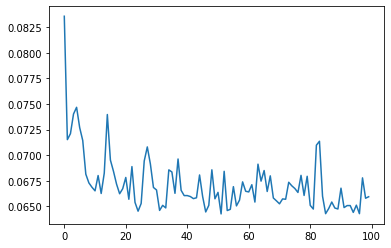

In [32]:
plt.plot(x,timeits)

Como se observa, las mediciones son irregulares y parecen tener picos. Esto puede ser debido a que el medidor de tiempo empleado es sensible al ruido. Por esto se empleará otro medidor de tiempo para ver que ocurre.

In [18]:
import time

In [33]:
times = []
tic = 0
toc = 0
e = 0
for i in range(100):
    tic = time.time()
    sumar_enteros_while()
    toc = time.time()
    e = toc - tic
    times.append(e)

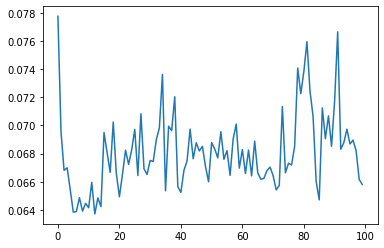

In [34]:
plt.plot(x,times)

Un gráfico conjunto de las dos formas de medir el tiempo

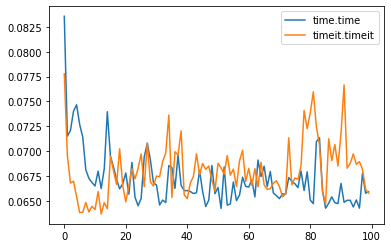

In [35]:
# gráfico con leyenda
plt.plot(x,timeits, label='time.time')
plt.plot(x,times, label='timeit.timeit')
# para mostrar la leyenda
plt.legend()

Se observa que ambas mediciones de tiempo son muy irregulares. Sumar el ruido que se ha introducido en nuestras mediciones y luego promediar implicaría que estamos promediando el ruido y esto desviaría el resultado final de lo real. ¿Cómo medir esta distorsión? ¿Cómo eliminar el ruido?

## Filtro mediana unidimensional

El filtro de mediana es un algoritmo empleado para eliminar.

In [46]:
import statistics

In [55]:
timeitsn = []
ventana = 9
for i in range(len(timeits)):
    inicio = i - ventana if (i - ventana > 0) else i
    fin = i + ventana if (i + ventana < len(timeits)) else len(timeits)
    timeitsn.append(statistics.median(times[inicio:fin]))

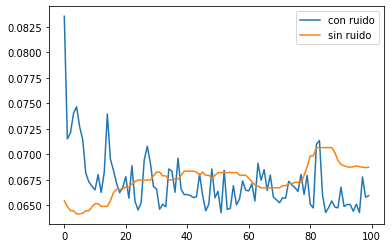

In [56]:
# gráfico con leyenda
plt.plot(x,timeits, label='con ruido')
plt.plot(x,timeitsn, label='sin ruido')
# para mostrar la leyenda
plt.legend()

Como puede observar en la gráfica, una vez aplicado el filtro a las mediciones, la tendencia es más regular.